# Atividade 02 – Criando um Modelo Não Linear para o Alto-falante

Nesta atividade, vamos expandir o modelo linear do alto-falante introduzido anteriormente, incorporando efeitos não lineares no fator de força \(Bl\). Ao contrário do modelo linear, que assume \(Bl\) constante, aqui iremos considerar que o valor de \(Bl\) diminui à medida que o alto-falante se afasta da posição de repouso (\(x = 0\)).

- **Região Linear (\(|x| \le x_1\)):**  
  O fator de força \(Bl\) permanece constante, igual ao valor utilizado no modelo linear.

- **Região Nula (\(|x| \ge x_2\)):**  
  O fator \(Bl\) é zero, ou seja, o alto-falante não gera força além deste limite.

- **Região de Transição (\(x_1 < |x| < x_2\)):**  
  O valor de \(Bl\) decai de forma polinomial, sendo modelado por um polinômio de ordem 2, permitindo uma transição suave entre a região linear e a região nula.

Os limites \(x_1\) e \(x_2\) são definidos como 75% e 150% da excursão máxima do cone obtida no modelo linear, respectivamente. Esta abordagem visa capturar de forma mais realista o comportamento não linear do alto-falante sob variações de deslocamento.


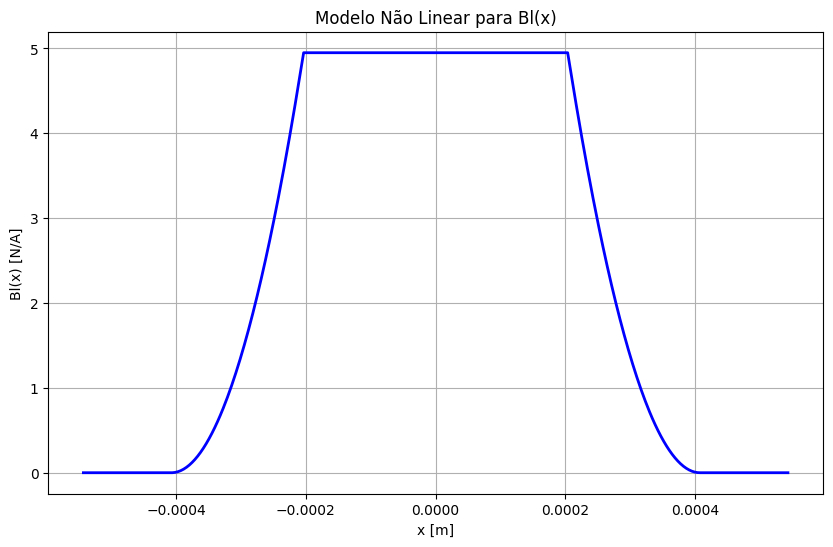

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Valor constante de Bl do modelo linear
Bl = 4.95  

# Valor x_abs_max (valor obtidos na Atividade 01) 
x_abs_max = 0.00027148858093880836 

# Definição dos limites: 75% e 150% do deslocamento máximo
x1 = 0.75 * x_abs_max
x2 = 1.5  * x_abs_max

def B_l_nl(x):
    """
    Função não linear para o fator de força B_l(x).
    - Se |x| <= x1, opera no regime linear: retorna Bl.
    - Se |x| >= x2, a força é anulada: retorna 0.
    - Caso contrário, aplica uma variação quadrática.
    """
    if abs(x) <= x1:
        return Bl
    elif abs(x) >= x2:
        return 0.0
    else:
        # Coeficiente para variação quadrática
        a = Bl / (x2 - x1)**2
        if x > 0:
            return a * (x - x2)**2
        else:
            return a * (x + x2)**2

# Geração dos valores de x e avaliação de Bl(x)
xs = np.linspace(-2 * x_abs_max, 2 * x_abs_max, 500)
vals = [B_l_nl(x) for x in xs]

# Plot da função Bl(x)
plt.figure(figsize=(10, 6))
plt.plot(xs, vals, 'b-', linewidth=2)
plt.xlabel('x [m]')
plt.ylabel('Bl(x) [N/A]')
plt.title('Modelo Não Linear para Bl(x)')
plt.grid(True)
plt.show()
